<a href="https://www.kaggle.com/code/utkarshx27/predicting-antioxidant-activity-in-lager-beer?scriptVersionId=130254166" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lager-beer-antioxidant-and-activity-40-varieties/lager_antioxidant_reg.csv


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/lager-beer-antioxidant-and-activity-40-varieties/lager_antioxidant_reg.csv')
df.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   beer    40 non-null     int64  
 1   tpc     40 non-null     float64
 2   ma      40 non-null     float64
 3   dsa     40 non-null     float64
 4   asa     40 non-null     float64
 5   orac    40 non-null     float64
 6   rp      40 non-null     float64
 7   mca     40 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 2.6 KB


# Total Phenolic Content (tpc)

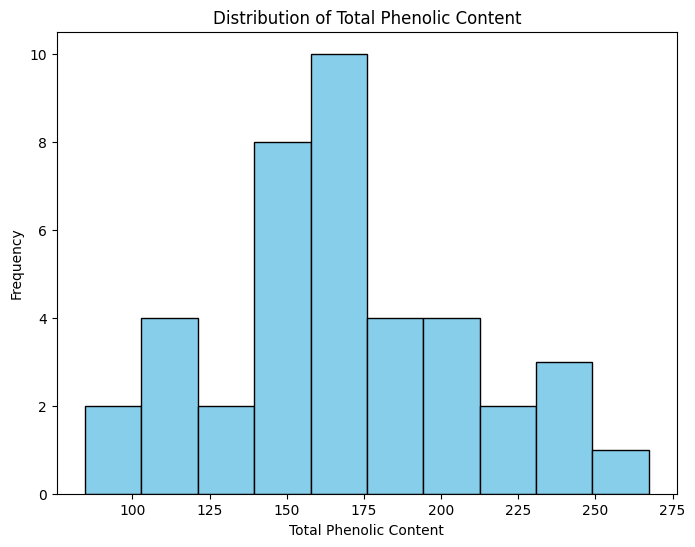

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(df['tpc'], bins=10,edgecolor='black', color='skyblue')
plt.xlabel('Total Phenolic Content')
plt.ylabel('Frequency')
plt.title('Distribution of Total Phenolic Content')
plt.show()

# Melanoidin Content (ma)

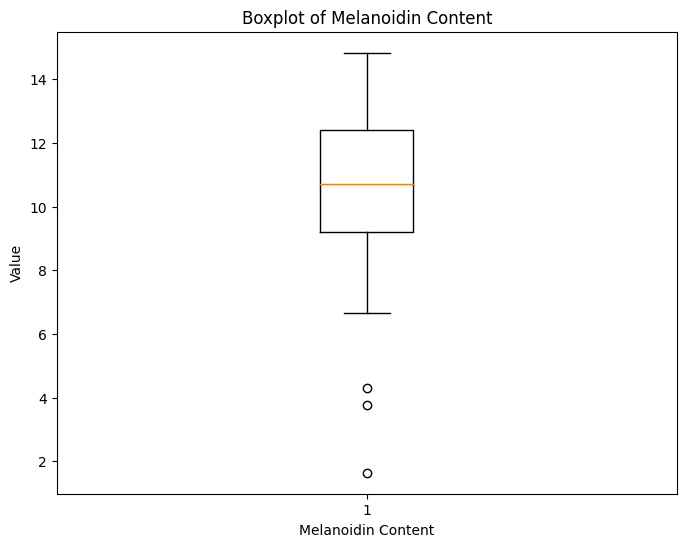

In [6]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['ma'])
plt.xlabel('Melanoidin Content')
plt.ylabel('Value')
plt.title('Boxplot of Melanoidin Content')
plt.show()

# DPPH Radical Scavenging Activity (dsa)

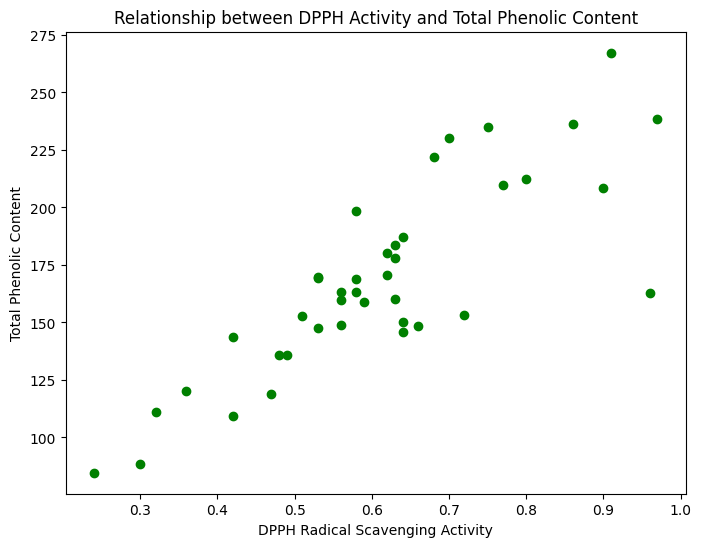

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(df['dsa'], df['tpc'], color='green')
plt.xlabel('DPPH Radical Scavenging Activity')
plt.ylabel('Total Phenolic Content')
plt.title('Relationship between DPPH Activity and Total Phenolic Content')
plt.show()

# Correlation Matrix

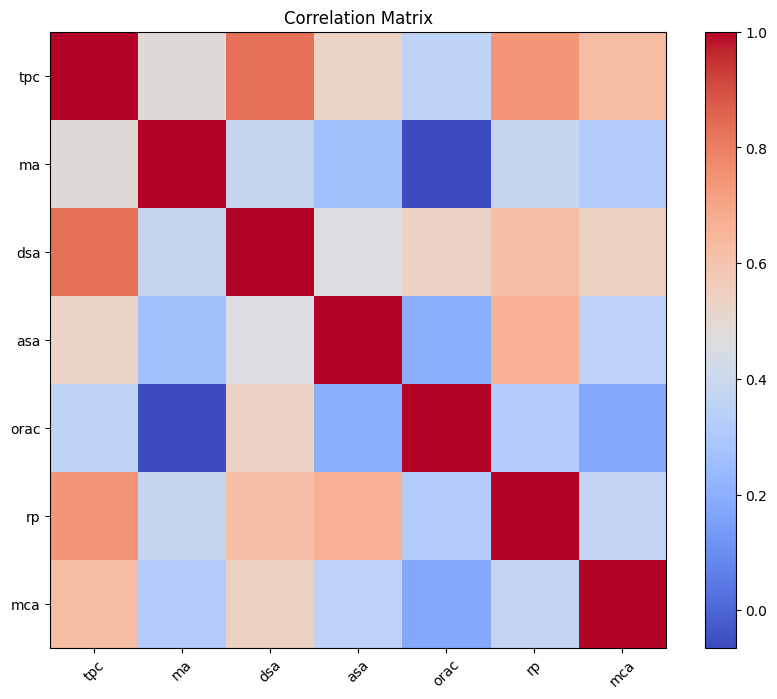

In [8]:
correlation_matrix = df[['tpc', 'ma', 'dsa', 'asa', 'orac', 'rp', 'mca']].corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

# Predicting Antioxidant Activity

In [9]:
X = df[['tpc', 'ma']].values
y = df[['dsa', 'asa', 'orac', 'rp', 'mca']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared Score:', r2)

Mean Squared Error: 25.069152032999984
Mean Absolute Error: 2.3527050000000003
R-squared Score: 0.15374039790599664


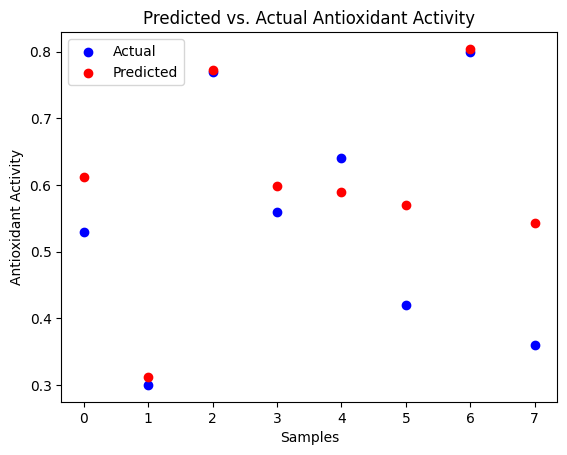

In [11]:
target_index = 0
plt.scatter(range(len(y_test)), y_test[:, target_index], color='b', label='Actual')
plt.scatter(range(len(y_pred)), y_pred[:, target_index], color='r', label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Antioxidant Activity')
plt.title('Predicted vs. Actual Antioxidant Activity')
plt.legend()
plt.show()

In [12]:
X = df[['tpc', 'ma']].values
y = df[['dsa', 'asa', 'orac', 'rp', 'mca']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = []
for i in range(y_train.shape[1]):
    model = SVR()
    model.fit(X_train, y_train[:, i])
    models.append(model)
y_pred = np.zeros_like(y_test)
for i, model in enumerate(models):
    y_pred[:, i] = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)   #na
print('R-squared Score:', r2)

Mean Squared Error: 83.83581004336753
Mean Absolute Error: 3.3438382209636592
R-squared Score: 0.34301838005223206


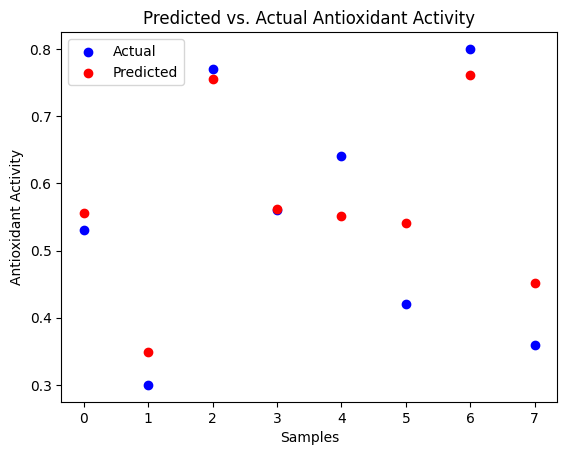

In [13]:
target_index = 0
plt.scatter(range(len(y_test)), y_test[:, target_index], color='b', label='Actual')
plt.scatter(range(len(y_pred)), y_pred[:, target_index], color='r', label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Antioxidant Activity')
plt.title('Predicted vs. Actual Antioxidant Activity')
plt.legend()
plt.show()